# I've tried with less number of train data with 8400 images. So, counts may vary.

In [1]:
from pathlib import Path
import pandas as pd
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import PIL

## Input folder with data & label excel file

In [11]:
cwd = os.getcwd()
print('For assistance, see current directory', cwd)

# Aishwarya
#data_image_path = 'C:/Users/Aishwarya/Desktop/NEU/SML/project/train/'

# Users⁩ ▸ ⁨aaronmoskowitz⁩ ▸ ⁨Documents SML_Project_Data
data_image_path = '/Users/aaronmoskowitz/Documents/SML_Project_Data/'

For assistance, see current directory /Users/aaronmoskowitz/Documents/DS-5220-Supervised-Machine-Learning-Project


In [13]:
train_image_path = data_image_path + 'train/'
my_file = Path(train_image_path)
#df = pd.read_csv('C:/Users/Aishwarya/Desktop/NEU/SML/project/trainLabels.csv', delimiter=',')

df = pd.read_csv(data_image_path + 'trainLabels.csv', delimiter=',')
df = df.query('image in {0}'.format([_.replace('.jpeg', '') for _ in os.listdir(my_file)]))
df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [14]:
def img_to_array(img):
    return np.array(img.getdata()).reshape(img.width, img.width, 3) / 255


def trim(im):
    """trim black margin, http://stackoverflow.com/questions/10615901/trim-whitespace-using-pil"""
    bg = PIL.Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = PIL.ImageChops.difference(im, bg)
    diff = PIL.ImageChops.add(diff, diff, 2.0, -20)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)


def calc_thumbnail_size(img):
    """calculate thumbnail size with constant aspect ratio"""
    width, length = img.size
    ratio = width / length

    # for some reason, if it's exactly 224, then thumnailed image is 223
    dim = 224 + 1          # output dim
    if ratio > 1:
        size = (dim * ratio, dim)
    else:
        size = (dim, dim / ratio)
#     print(size)
    return size

def calc_crop_coords(img):
    """crop to square of desired dimension size"""
    dim = 224
    width, length = img.size
    left = 0
    right = width
    bottom = length
    top = 0
    if width > dim:
        delta = (width - dim) / 2
        left = delta
        right = width - delta
    if length > dim:
        delta = (length - dim) / 2
        top = delta
        bottom = length - delta
    return (left, top, right, bottom)


def preprocess(img):
    img = trim(img)
    tsize = calc_thumbnail_size(img)
    img.thumbnail(tsize)
    crop_coords = calc_crop_coords(img)
    img = img.crop(crop_coords)
    return img

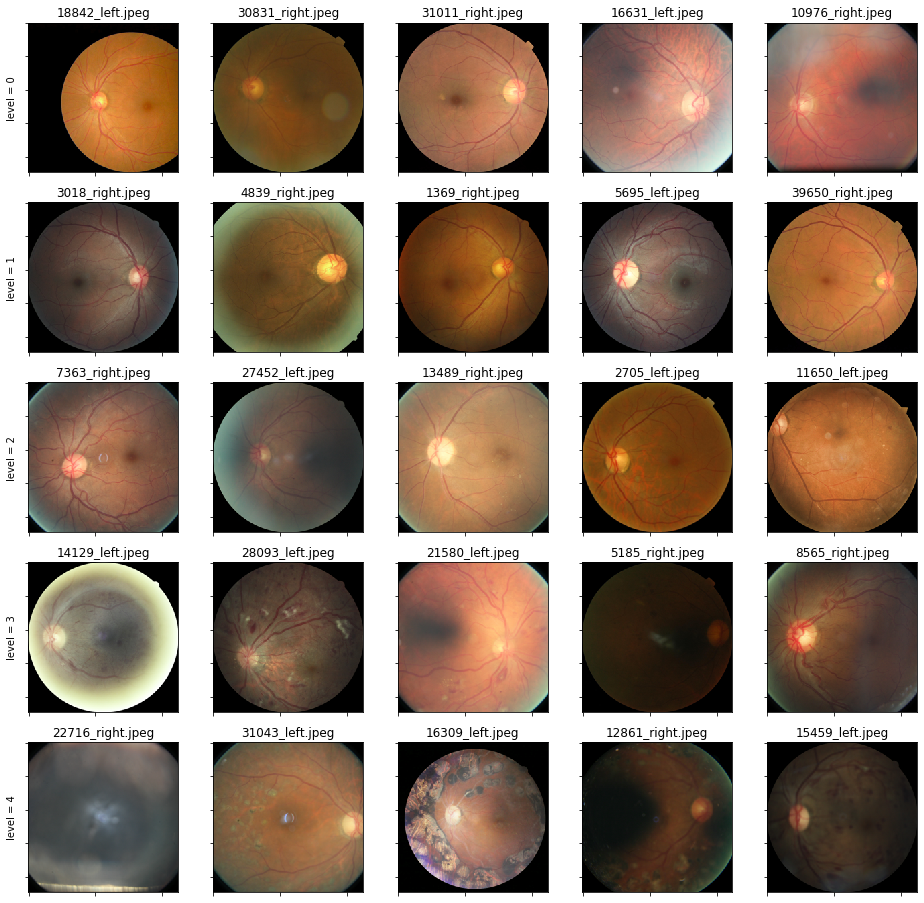

In [15]:
def img_to_array(img):
    return np.array(img.getdata()).reshape(img.width, img.width, 3) / 255


import matplotlib.image as mpimg
imgs_with_label = []
n_samples = 5
for i in range(5):
    _vals = df.query('level == {0}'.format(i)).sample(n_samples).image.apply(
        lambda v: (os.path.join(my_file, v) + '.jpeg', i)).values.tolist()
    imgs_with_label.extend(_vals)

fig, axes = plt.subplots(5, 5, figsize=(16, 16))
axes = axes.ravel()
for k, (img, label) in enumerate(imgs_with_label):
   
    im = PIL.Image.open(img)
    ax = axes[k]
    im = preprocess(im)
    ax.imshow(img_to_array(im))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    if k % 5 == 0:
        ax.set_ylabel('level = {0}'.format(label))
    ax.set_title(os.path.basename(img))
plt.show()

# Data Augumentation

## More methods can be applied
https://software.intel.com/en-us/articles/hands-on-ai-part-14-image-data-preprocessing-and-augmentation might be helpful

In [17]:
import random
from scipy import ndarray
import skimage as sk

from skimage import transform
from skimage import util
from skimage import io


def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

## I'm generating 1000 more images. We can set a definite count for each class for image generation

In [35]:
import random
import os
from skimage import img_as_ubyte

# our folder path containing some images
folder_path = 'C:/Users/Aishwarya/Desktop/NEU/SML/project/data/resized_1'

# the number of files to generate
num_files_desired = 1000

# loop on all files of the folder and build a list of files paths
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}
num_generated_files = 0
while num_generated_files <= num_files_desired:
    # random image from the folder
    image_path = random.choice(images)
    # read image as an two dimensional array of pixels
    image_to_transform = sk.io.imread(image_path)
    # random num of transformation to apply
    num_transformations_to_apply = random.randint(1, len(available_transformations))

    
    num_transformations = 0
    transformed_image = None
    while num_transformations <= num_transformations_to_apply:
        # random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        transformed_image = available_transformations[key](image_to_transform)
        num_transformations += 1
        new_path = 'C:/Users/Aishwarya/Desktop/NEU/SML/project/data/resized_1/augmented_image_'+ str(num_generated_files) + '.jpeg'
    # write image to the disk
    io.imsave(new_path,img_as_ubyte(transformed_image))
    num_generated_files += 1

    